In [18]:
import random
from random import randint
"""
Map is a two dimension matrix.
O: robot can move
-1: robot can not move
"""
def generate_map_random(cols, rows, obstacles_no):
    maps = []
    temp = []
    values=[]
    for i in range(cols*rows):
        temp.append(0)
    for i in range(obstacles_no):
        temp[i] = -1
    random.shuffle(temp)
    observed_map = []
    for j in range(rows):
        r = []
        s = []
        t = []
        for i in range(cols):
            r.append(temp[j*cols+i])
            s.append(-1)
            t.append(0.00)
        observed_map.append(s)
        maps.append(r)
        values.append(t)
    return maps, observed_map,values

def generate_map_random_for_test(cols, rows, obstacles_no):
    maps = []
    for j in range(rows):
        r = []
        for i in range(cols):
            r.append(1)
        maps.append(r)
    for k in range(obstacles_no):
        i = randint(0, rows - 1)
        j = randint(0, cols - 1)
        maps[i][j] = -1
    for k in range(1):
        i = randint(0, rows - 1)
        j = randint(0, cols - 1)
        maps[i][j] = 0
    return maps
def print_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    steps = 0
    for i in range(rows):
        print(matrix[i])
        for j in range(cols):
            if matrix[i][j]>=0:
                steps += matrix[i][j]
    print('step number', steps)
def print_progress_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    positive_number = 0
    nagative_number = 0
    zero_number = 0
    steps = 0
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j]>0:
                positive_number += 1
                steps += matrix[i][j]
            if matrix[i][j]<0:
                nagative_number += 1
            if matrix[i][j]==0:
                zero_number += 1
    print('positive', positive_number, 'nagative', nagative_number,'zero', zero_number, 'step', steps)

In [19]:
class Position:
    x = 0
    y = 0
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def pos(self):
        return "{}-{}".format(self.x, self.y)

In [3]:
maps, observed_map,values = generate_map_random(5,5,0)
start_position = Position(0, 0)



In [35]:
pos=Position(start_position.x,start_position.y)

In [12]:
values

[[0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0]]

In [5]:
maps

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [71]:
len(maps)

4

In [36]:
values[pos.x][pos.y]

0.0

In [26]:
maps, observed_map,values = generate_map_random(4,4,0)


In [33]:
state=0

In [59]:
def state2loc(state,maps):
    row=(state/len(maps[0]))
    col=state-int(row)*len(maps[0])
    return int(row),int(col)
def loc2state(row,col,maps):
    return int(len(maps[0])*row+col)

In [70]:
(maps[-1][-1]).i

0

In [86]:
def look(state,maps):
    av=[]
    actions=[]
    row,col=state2loc(state,maps)
    if (row-1)>-1 and maps[row-1][col]==0:
        av.append(loc2state(row-1,col,maps))
        actions.append(0)
    if (row+1)<len(maps[0]) and maps[row+1][col]==0:
        av.append(loc2state(row+1,col,maps))
        actions.append(1)
    if (col-1)>-1 and maps[row][col-1]==0:
        av.append(loc2state(row,col-1,maps))
        actions.append(2)
    if (col+1)<len(maps) and maps[row][col+1]==0:
        av.append(loc2state(row,col+1,maps))
        actions.append(3)
    return av,actions

In [93]:
def act(state,avac,maps):
    if avac == 0:
        state=state-4
    if avac ==1:
        state=state+4
    if avac==2:
        state=state-1
    if avac==3:
        state=state+1
    return state

In [96]:
max(qvalues[0])

0.0

[1, 2, 4, 7]

In [138]:
qvalues

[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [252]:
look(state,maps)

([4, 12, 9], [0, 1, 3])

In [253]:
qvalues[4]

[-2.0, 0.0, 0.0, -2.0]

In [256]:
qvalues[9]

[0.0, -2.0, 0.0, -2.0]

In [264]:
state

8

In [262]:
ttmpx=0
ttmpv=[]


In [ ]:
        
    """ 
    target=unvisit[0]    
    avloc_,avac_=look(xx,maps)
    ttmpq=qvalues[target][avac_[0]]
    for xx in  unvisit:
        avloc_,avac_=look(xx,maps)
        for avacc in avac_:
            if qvalues[xx][avacc]>ttmpq:
                target=xx
                ttmpq=qvalues[xx][avacc]  
    """   
    
     """
         for ch in avac:
        if act(state,ch,maps)in unvisit:
            qvalues[state][ch]=qvalues[state][ch]+0+max(qvalues[act(state,ch,maps)])
        if act(state,ch,maps)in visited:
            qvalues[state][ch]=qvalues[state][ch]-1+max(qvalues[act(state,ch,maps)])                  
    ttmp=qvalues[state][avac[0]]
    ttmpac=avac[0]
    for x in avac:
        if qvalues[state][x]>ttmp:
            ttmp=qvalues[state][x]
            ttmpac=x    
    state=act(state,ttmpac,maps)
     
     """   


In [263]:
max(ttmp)

-4.0

In [257]:
sum(qvalues[9])

-4.0

In [287]:
state=2
visited=[]
unvisit=[]
target=0
ttmpq=0

In [467]:
maps, observed_map,values = generate_map_random(4,4,0)
qvalues=[]
for j in range(16):
    t = []
    for i in range(4):
        t.append(0.00)
    qvalues.append(t)

In [369]:
episode=0
record=[]
while (episode<100):
    episode=episode+1
    stepN=0
    chose=0
    state=7
    visited=[]
    unvisit=[]
    target=0
    ttmpq=0
    while (stepN<30):
        if state in unvisit:
            unvisit.remove(state)   
        visited.append(state)
        avloc,avac=look(state,maps)
        for x in avloc:
            if x not in unvisit and x not in visited:
                unvisit.append(x)

        if  len(unvisit)==0:
            break

        for x in avloc:
            ttmpx=x
            ttmpv=sum(qvalues[x])
            break
        for x in avloc:
            if sum(qvalues[x])>ttmpv:
                ttmpv=sum(qvalues[x])
                ttmpx=x
        for x in avac:
            if act(state,x,maps)==ttmpx:
                chose=x
                break
        if ttmpx in visited:
            qvalues[state][chose]=qvalues[state][chose]-1+min(qvalues[ttmpx])
        if ttmpx in unvisit:  
            qvalues[state][chose]=qvalues[state][chose]+min(qvalues[ttmpx])
        state=ttmpx    
        #print('visited:',visited, 'unvisited:',unvisit,"target:",target,'  ->',state)
        print('visited:',visited, 'unvisited:',unvisit,'  ->',state)
        stepN=stepN+1
        #qvalues
    record.append(stepN)
    print("finished after:",stepN)

visited: [7] unvisited: [3, 11, 6]   -> 3
visited: [7, 3] unvisited: [11, 6, 2]   -> 2
visited: [7, 3, 2] unvisited: [11, 6, 1]   -> 6
visited: [7, 3, 2, 6] unvisited: [11, 1, 10, 5]   -> 5
visited: [7, 3, 2, 6, 5] unvisited: [11, 1, 10, 9, 4]   -> 1
visited: [7, 3, 2, 6, 5, 1] unvisited: [11, 10, 9, 4, 0]   -> 0
visited: [7, 3, 2, 6, 5, 1, 0] unvisited: [11, 10, 9, 4]   -> 4
visited: [7, 3, 2, 6, 5, 1, 0, 4] unvisited: [11, 10, 9, 8]   -> 8
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8] unvisited: [11, 10, 9, 12]   -> 9
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9] unvisited: [11, 10, 12, 13]   -> 10
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9, 10] unvisited: [11, 12, 13, 14]   -> 11
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9, 10, 11] unvisited: [12, 13, 14, 15]   -> 15
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9, 10, 11, 15] unvisited: [12, 13, 14]   -> 14
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9, 10, 11, 15, 14] unvisited: [12, 13]   -> 13
visited: [7, 3, 2, 6, 5, 1, 0, 4, 8, 9, 10, 11, 15, 14, 13] unvisited: [12]

In [545]:
maps, observed_map,values = generate_map_random(4,4,0)
qvalues=[]
for j in range(16):
    t = []
    for i in range(4):
        t.append(0.00)
    qvalues.append(t)

In [551]:
episode=0
record=[]
while (episode<100):
    episode=episode+1
    stepN=0
    chose=0
    state=7
    visited=[]
    unvisit=[]
    target=0
    ttmpq=0
    while (stepN<30):
        if state in unvisit:
            unvisit.remove(state)   
        visited.append(state)
        avloc,avac=look(state,maps)
        for x in avloc:
            if x not in unvisit and x not in visited:
                unvisit.append(x)

        if  len(unvisit)==0:
            break

        for x in avloc:
            ttmpx=x
            ttmpv=sum(qvalues[x])
            break
        for x in avloc:
            if sum(qvalues[x])>ttmpv:
                ttmpv=sum(qvalues[x])
                ttmpx=x
        for x in avac:
            if act(state,x,maps)==ttmpx:
                chose=x
                break
        if ttmpx in visited:
            qvalues[state][chose]=qvalues[state][chose]-1+min(qvalues[ttmpx])
        if ttmpx in unvisit:  
            qvalues[state][chose]=qvalues[state][chose]+min(qvalues[ttmpx])
        state=ttmpx    
        #print('visited:',visited, 'unvisited:',unvisit,"target:",target,'  ->',state)
        #print('visited:',visited, 'unvisited:',unvisit,'  ->',state)
        stepN=stepN+1
        #qvalues
    record.append(stepN)
    norm(qvalues)
    #print("finished after:",stepN)

In [540]:
qvalues

[[0.0, -745.0, 0.0, -427.0],
 [0.0, -55.0, -805.0, -272.0],
 [0.0, -374.0, -247.0, -379.0],
 [0.0, -190.0, -509.0, 0.0],
 [-421.0, -483.0, 0.0, -296.0],
 [-438.0, -448.0, -65.0, -1.0],
 [-362.0, -349.0, -136.0, -1.0],
 [-271.0, -207.0, -327.0, 0.0],
 [-374.0, -596.0, 0.0, -32.0],
 [-522.0, -170.0, -123.0, -220.0],
 [-275.0, -271.0, -277.0, -88.0],
 [-86.0, -357.0, -300.0, 0.0],
 [-346.0, 0.0, 0.0, -631.0],
 [-140.0, 0.0, -376.0, -89.0],
 [-89.0, 0.0, -207.0, -393.0],
 [-470.0, 0.0, -284.0, 0.0]]

In [548]:
import math
def norm(qvalue):      
    for x in range(len(qvalue)):
        tmp=0.00
        for y in range(len(qvalue[0])):
            tmp=tmp+qvalue[x][y]*qvalue[x][y]
        tmp=math.sqrt(tmp)    
        for y in range(len(qvalue[0])):
            if tmp>0:
                qvalue[x][y]=(qvalue[x][y]/tmp)
            qvalue[x][y]=float( '%.3f' % qvalue[x][y])
    return qvalue

In [544]:
norm(qvalues)

[[0.0, -0.868, 0.0, -0.497],
 [0.0, -0.065, -0.945, -0.319],
 [0.0, -0.637, -0.421, -0.646],
 [0.0, -0.35, -0.937, 0.0],
 [-0.596, -0.684, 0.0, -0.419],
 [-0.695, -0.711, -0.103, -0.002],
 [-0.695, -0.67, -0.261, -0.002],
 [-0.574, -0.438, -0.692, 0.0],
 [-0.531, -0.846, 0.0, -0.045],
 [-0.864, -0.281, -0.204, -0.364],
 [-0.569, -0.561, -0.573, -0.182],
 [-0.181, -0.753, -0.633, 0.0],
 [-0.481, 0.0, 0.0, -0.877],
 [-0.341, 0.0, -0.915, -0.217],
 [-0.196, 0.0, -0.457, -0.868],
 [-0.856, 0.0, -0.517, 0.0]]

In [553]:
qvalues

[[0.0, -0.997, 0.0, -0.083],
 [0.0, -0.083, -0.997, -0.0],
 [0.0, -0.202, -0.979, -0.0],
 [0.0, -0.0, -1.0, 0.0],
 [-0.131, -0.785, 0.0, -0.605],
 [-0.564, -0.483, -0.0, -0.67],
 [-0.0, -0.828, -0.561, -0.0],
 [-1.0, -0.0, -0.0, 0.0],
 [-0.139, -0.417, 0.0, -0.898],
 [-0.65, -0.76, -0.023, -0.014],
 [-0.632, -0.316, -0.0, -0.707],
 [-0.0, -0.707, -0.707, 0.0],
 [-0.626, 0.0, 0.0, -0.78],
 [-0.0, 0.0, -0.884, -0.467],
 [-0.0, 0.0, -0.735, -0.678],
 [-0.717, 0.0, -0.697, 0.0]]

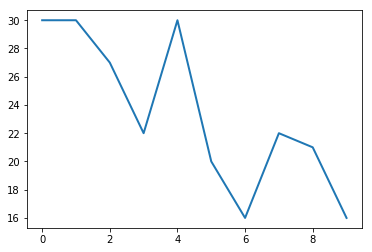

In [487]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(record)

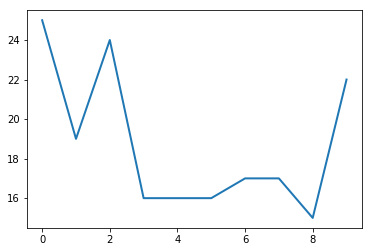

In [550]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(record)

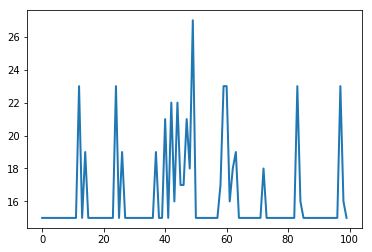

In [552]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(record)

In [554]:
maps, observed_map,values = generate_map_random(10,10,0)
qvalues=[]
for j in range(100):
    t = []
    for i in range(4):
        t.append(0.00)
    qvalues.append(t)

In [555]:
episode=0
record=[]
while (episode<100):
    episode=episode+1
    stepN=0
    chose=1
    state=7
    visited=[]
    unvisit=[]
    target=0
    ttmpq=0
    while (stepN<1000):
        if state in unvisit:
            unvisit.remove(state)   
        visited.append(state)
        avloc,avac=look(state,maps)
        for x in avloc:
            if x not in unvisit and x not in visited:
                unvisit.append(x)
        if  len(unvisit)==0:
            break
        for x in avloc:
            ttmpx=x
            ttmpv=sum(qvalues[x])
            break
        for x in avloc:
            if sum(qvalues[x])>ttmpv:
                ttmpv=sum(qvalues[x])
                ttmpx=x
        for x in avac:
            if act(state,x,maps)==ttmpx:
                chose=x
                break
        if ttmpx in visited:
            qvalues[state][chose]=0.999*qvalues[state][chose]-1+min(qvalues[ttmpx])
        if ttmpx in unvisit:  
            qvalues[state][chose]=0.999*qvalues[state][chose]+min(qvalues[ttmpx])
        state=ttmpx    
        #print('visited:',visited, 'unvisited:',unvisit,"target:",target,'  ->',state)
        #print('visited:',visited, 'unvisited:',unvisit,'  ->',state)
        stepN=stepN+1
        #qvalues
    record.append(stepN)
    norm(qvalues)
    #print("finished after:",stepN)

In [466]:
min(record)

136

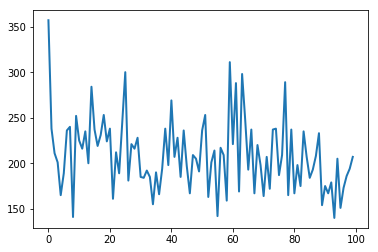

In [456]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(record)

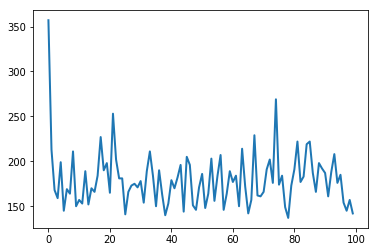

In [556]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(record)

In [248]:
state

8

In [88]:
for x in unvisit:
    print(qvalues[x])
    

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


In [78]:
visited

[1]

In [79]:
for x,_ in look(5,maps):
    if x not in visited:
        print(x)

9
4
6


In [75]:
look(5,maps)

[1, 9, 4, 6]

In [14]:
qvalues[15][3]=qvalues[15][3]+0.1

In [25]:
qvalues[0].index(max(qvalues[0]))

0

In [31]:
qvalues


[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [3]:
class Robot:
    maps = None
    position = None
    direction = 0
    turn_number = 0
    step_number = 0
    paths = []
    def __init__(self, maps, position, direction):
        self.maps = maps
        self.position = position
        self.direction = direction
        self.maps[position.y][position.x] += 1
        self.log(self.position)
    def turn_left(self):
        self.direction = int((self.direction + 3) % 4)
        self.turn_number += 1
    def turn_right(self):
        self.direction = int((self.direction + 1) % 4)
        self.turn_number += 1
    def move(self):
        '''
            direction:
            0: move right
            1: move down
            2: move left
            3: move up
        '''
        if self.direction == 0 and self.can_move(self.direction):
            self.position.x += 1
            self.log(self.position)
        if self.direction == 1 and self.can_move(self.direction):
            self.position.y += 1
            self.log(self.position)
        if self.direction == 2 and self.can_move(self.direction):
            self.position.x -= 1
            self.log(self.position)
        if self.direction == 3 and self.can_move(self.direction):
            self.position.y -= 1
            self.log(self.position)

    def can_move(self, direction):
        if direction == 0 and self.position.x < len(self.maps[0]) - 1 and self.maps[self.position.y][self.position.x + 1] >= 0:
            return True
        if direction == 1 and self.position.y < len(self.maps) - 1 and self.maps[self.position.y + 1][self.position.x] >= 0:
            return True
        if direction == 2 and self.position.x > 0 and self.maps[self.position.y][self.position.x - 1] >= 0:
            return True
        if direction == 3 and self.position.y > 0 and self.maps[self.position.y - 1][self.position.x] >= 0:
            return True
        return False
    def has_uncleaned_cell(self, direction):
        if direction == 0 and self.position.x < len(self.maps[0]) - 1 and self.maps[self.position.y][self.position.x + 1] == 0:
            return True
        if direction == 1 and self.position.y < len(self.maps) - 1 and self.maps[self.position.y + 1][self.position.x] == 0:
            return True
        if direction == 2 and self.position.x > 0 and self.maps[self.position.y][self.position.x - 1] == 0:
            return True
        if direction == 3 and self.position.y > 0 and self.maps[self.position.y - 1][self.position.x] == 0:
            return True
        return False
    def log(self, position):
        self.maps[self.position.y][self.position.x] += 1
        self.step_number +=1
        self.paths.append(position)

In [14]:
from queue import Queue
from math import fabs
class Sweeper:
    robot = None
    observed_maps = None
    def __init__(self, robot: Robot, maps):
        self.robot = robot
        self.observed_maps = maps
        self.look_around()
        self.observed_maps[self.robot.position.y][self.robot.position.x] = 1
    def work(self):
        start_position = self.robot.position
        while True:
            path, uncleaned_position = self.find_path(self.observed_maps, start_position)
            if uncleaned_position == None:
                break
            self.move_robot(path)
            self.observed_maps[uncleaned_position.y][uncleaned_position.x] += 1
            self.look_around()
            start_position = uncleaned_position
    def look_around(self):
        if self.robot.has_uncleaned_cell(direction=0) and self.observed_maps[self.robot.position.y][self.robot.position.x + 1] < 0:
            self.observed_maps[self.robot.position.y][self.robot.position.x + 1] = 0
        
        if self.robot.has_uncleaned_cell(direction=1) and self.observed_maps[self.robot.position.y + 1][self.robot.position.x] < 0:
            self.observed_maps[self.robot.position.y+1][self.robot.position.x] = 0
        
        if self.robot.has_uncleaned_cell(direction=2) and self.observed_maps[self.robot.position.y][self.robot.position.x - 1] < 0:
            self.observed_maps[self.robot.position.y][self.robot.position.x - 1] = 0
        
        if self.robot.has_uncleaned_cell(direction=3) and self.observed_maps[self.robot.position.y - 1][self.robot.position.x] < 0:
            self.observed_maps[self.robot.position.y -1][self.robot.position.x] = 0
    def move_robot(self, path):
        while len(path) > 0:
            next_pos = path.pop()
            print('-->', next_pos.pos())
            direction = 0
            if next_pos.x == self.robot.position.x + 1:
                direction = 0
            if next_pos.y == self.robot.position.y + 1:
                direction = 1
            if next_pos.x == self.robot.position.x - 1:
                direction = 2
            if next_pos.y == self.robot.position.y - 1:
                direction = 3
            rotate = direction - self.robot.direction
            if rotate == -1 or rotate == 3:
                self.robot.turn_left()
            elif rotate == 1 or rotate == -3:
                self.robot.turn_right()
            elif fabs(rotate) == 2:
                # turn back
                self.robot.turn_left()
                self.robot.turn_left()
            
            self.robot.move()
    def find_path(self, maps, from_position: Position):
        return None, None
    def get_path(self, from_position, to_position, previous_log):
        path = []
        if to_position != None:
            pos = to_position.pos()
            path.append(to_position)
            while pos in previous_log.keys():
                previous_position = previous_log[pos]
                pos = previous_position.pos()
                if previous_position.x != from_position.x or previous_position.y != from_position.y:
                    path.append(previous_position)
        return path

In [15]:
from queue import Queue
from math import fabs
class SweeperB(Sweeper):
    def find_path(self, maps, from_position:Position):
        adj_queue = Queue()
        visited = dict()
        previous = dict()
        adj_queue.put(from_position)
        target_position = None
        while not adj_queue.empty():
            position = adj_queue.get()
            if not position.pos() in visited.keys():
                visited[position.pos()] = True
                if maps[position.y][position.x] == 0:
                    target_position = position
                    break
                pos = Position(position.x + 1, position.y)
                if position.x < len(maps[0]) - 1 and maps[position.y][position.x + 1] >= 0 and not pos.pos() in visited.keys():
                    adj_queue.put(pos)
                    previous[pos.pos()] = position
                pos = Position(position.x, position.y + 1)
                if position.y < len(maps) - 1 and maps[position.y + 1][position.x] >= 0 and not pos.pos() in visited.keys():
                    adj_queue.put(pos)
                    previous[pos.pos()] = position
                pos = Position(position.x - 1, position.y)
                if position.x > 0 and maps[position.y][position.x - 1] >= 0 and not pos.pos() in visited.keys():
                    adj_queue.put(pos)
                    previous[pos.pos()] = position
                pos = Position(position.x, position.y - 1)
                if position.y > 0 and maps[position.y - 1][position.x] >= 0 and not pos.pos() in visited.keys():
                    adj_queue.put(pos)
                    previous[pos.pos()] = position
        path = self.get_path(from_position, target_position, previous)
        return path, target_position

In [17]:
def main():
    maps, observed_map = generate_map_random(5,5,0)
    start_position = Position(0, 0)
    robot = Robot(maps, start_position, 0)
    sweeper = SweeperB(robot, observed_map)
    sweeper.work()
    print('Robot result. Step number:', robot.step_number, 'Turn number:', robot.turn_number)
if __name__ == "__main__":
    main()

--> 1-0
--> 2-0
--> 3-0
--> 4-0
--> 4-1
--> 4-2
--> 4-3
--> 4-4
--> 3-4
--> 2-4
--> 1-4
--> 0-4
--> 0-3
--> 1-3
--> 2-3
--> 3-3
--> 3-2
--> 2-2
--> 1-2
--> 0-2
--> 0-1
--> 1-1
--> 2-1
--> 3-1
Robot result. Step number: 25 Turn number: 8


In [ ]:
q